0.0196078431372549 1.0 float64 (391, 293)


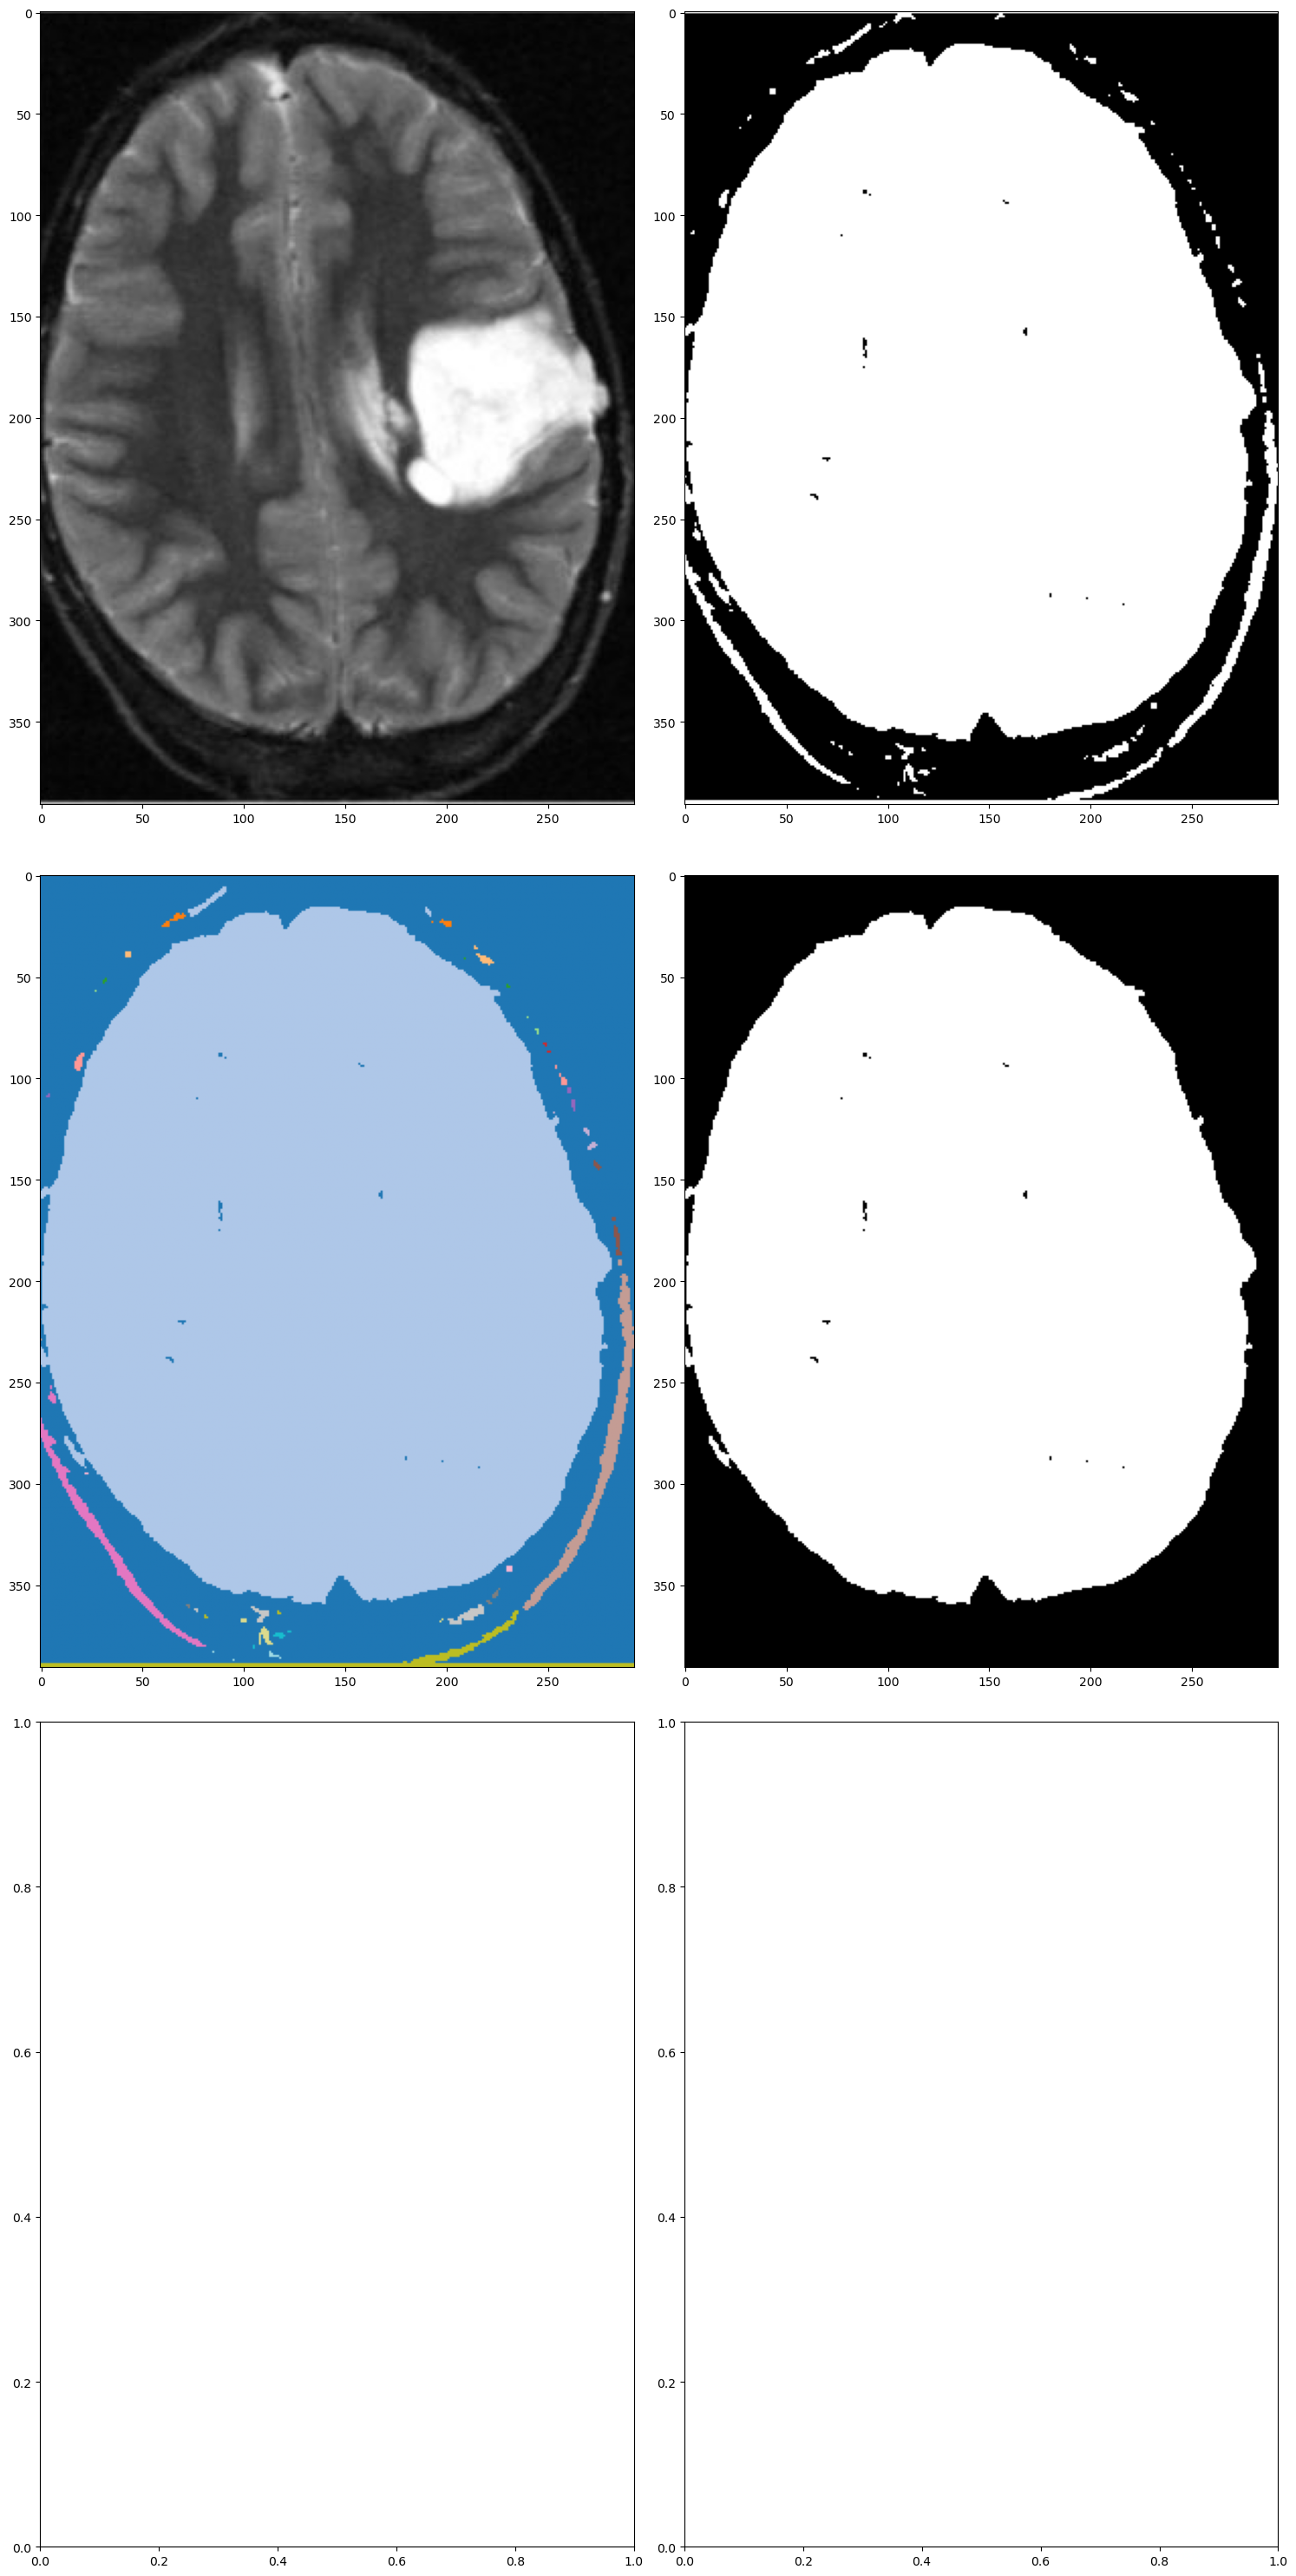

In [29]:
import numpy as np
from skimage import io, filters, morphology, measure, feature
import matplotlib.pyplot as plt

brain_tumor = io.imread('brain_tumor.png', as_gray = True)
print(brain_tumor.min(),brain_tumor.max(), brain_tumor.dtype, brain_tumor.shape)
plt.subplots(3,2,figsize = (15,30))
plt.subplot(3,2,1)
plt.imshow(brain_tumor, cmap='gray')
plt.subplot(3,2,2)
#filters.try_all_threshold(brain_tumor)
brain_tumor_th = brain_tumor > filters.threshold_triangle(brain_tumor)
plt.imshow(brain_tumor_th, cmap='gray')
plt.subplot(3,2,3)
labels = measure.label(brain_tumor_th)
plt.imshow(labels,cmap='tab20')
plt.subplot(3,2,4)

props = measure.regionprops(labels)
max_r = props[0]
for p in props:
    if max_r.area < p.area:
        max_r = p
im_max_region = np.zeros_like(brain_tumor)
for cord in max_r.coords:
    im_max_region[cord[0],cord[1]] = 1
plt.imshow(im_max_region,cmap='gray')
plt.tight_layout()
plt.show()




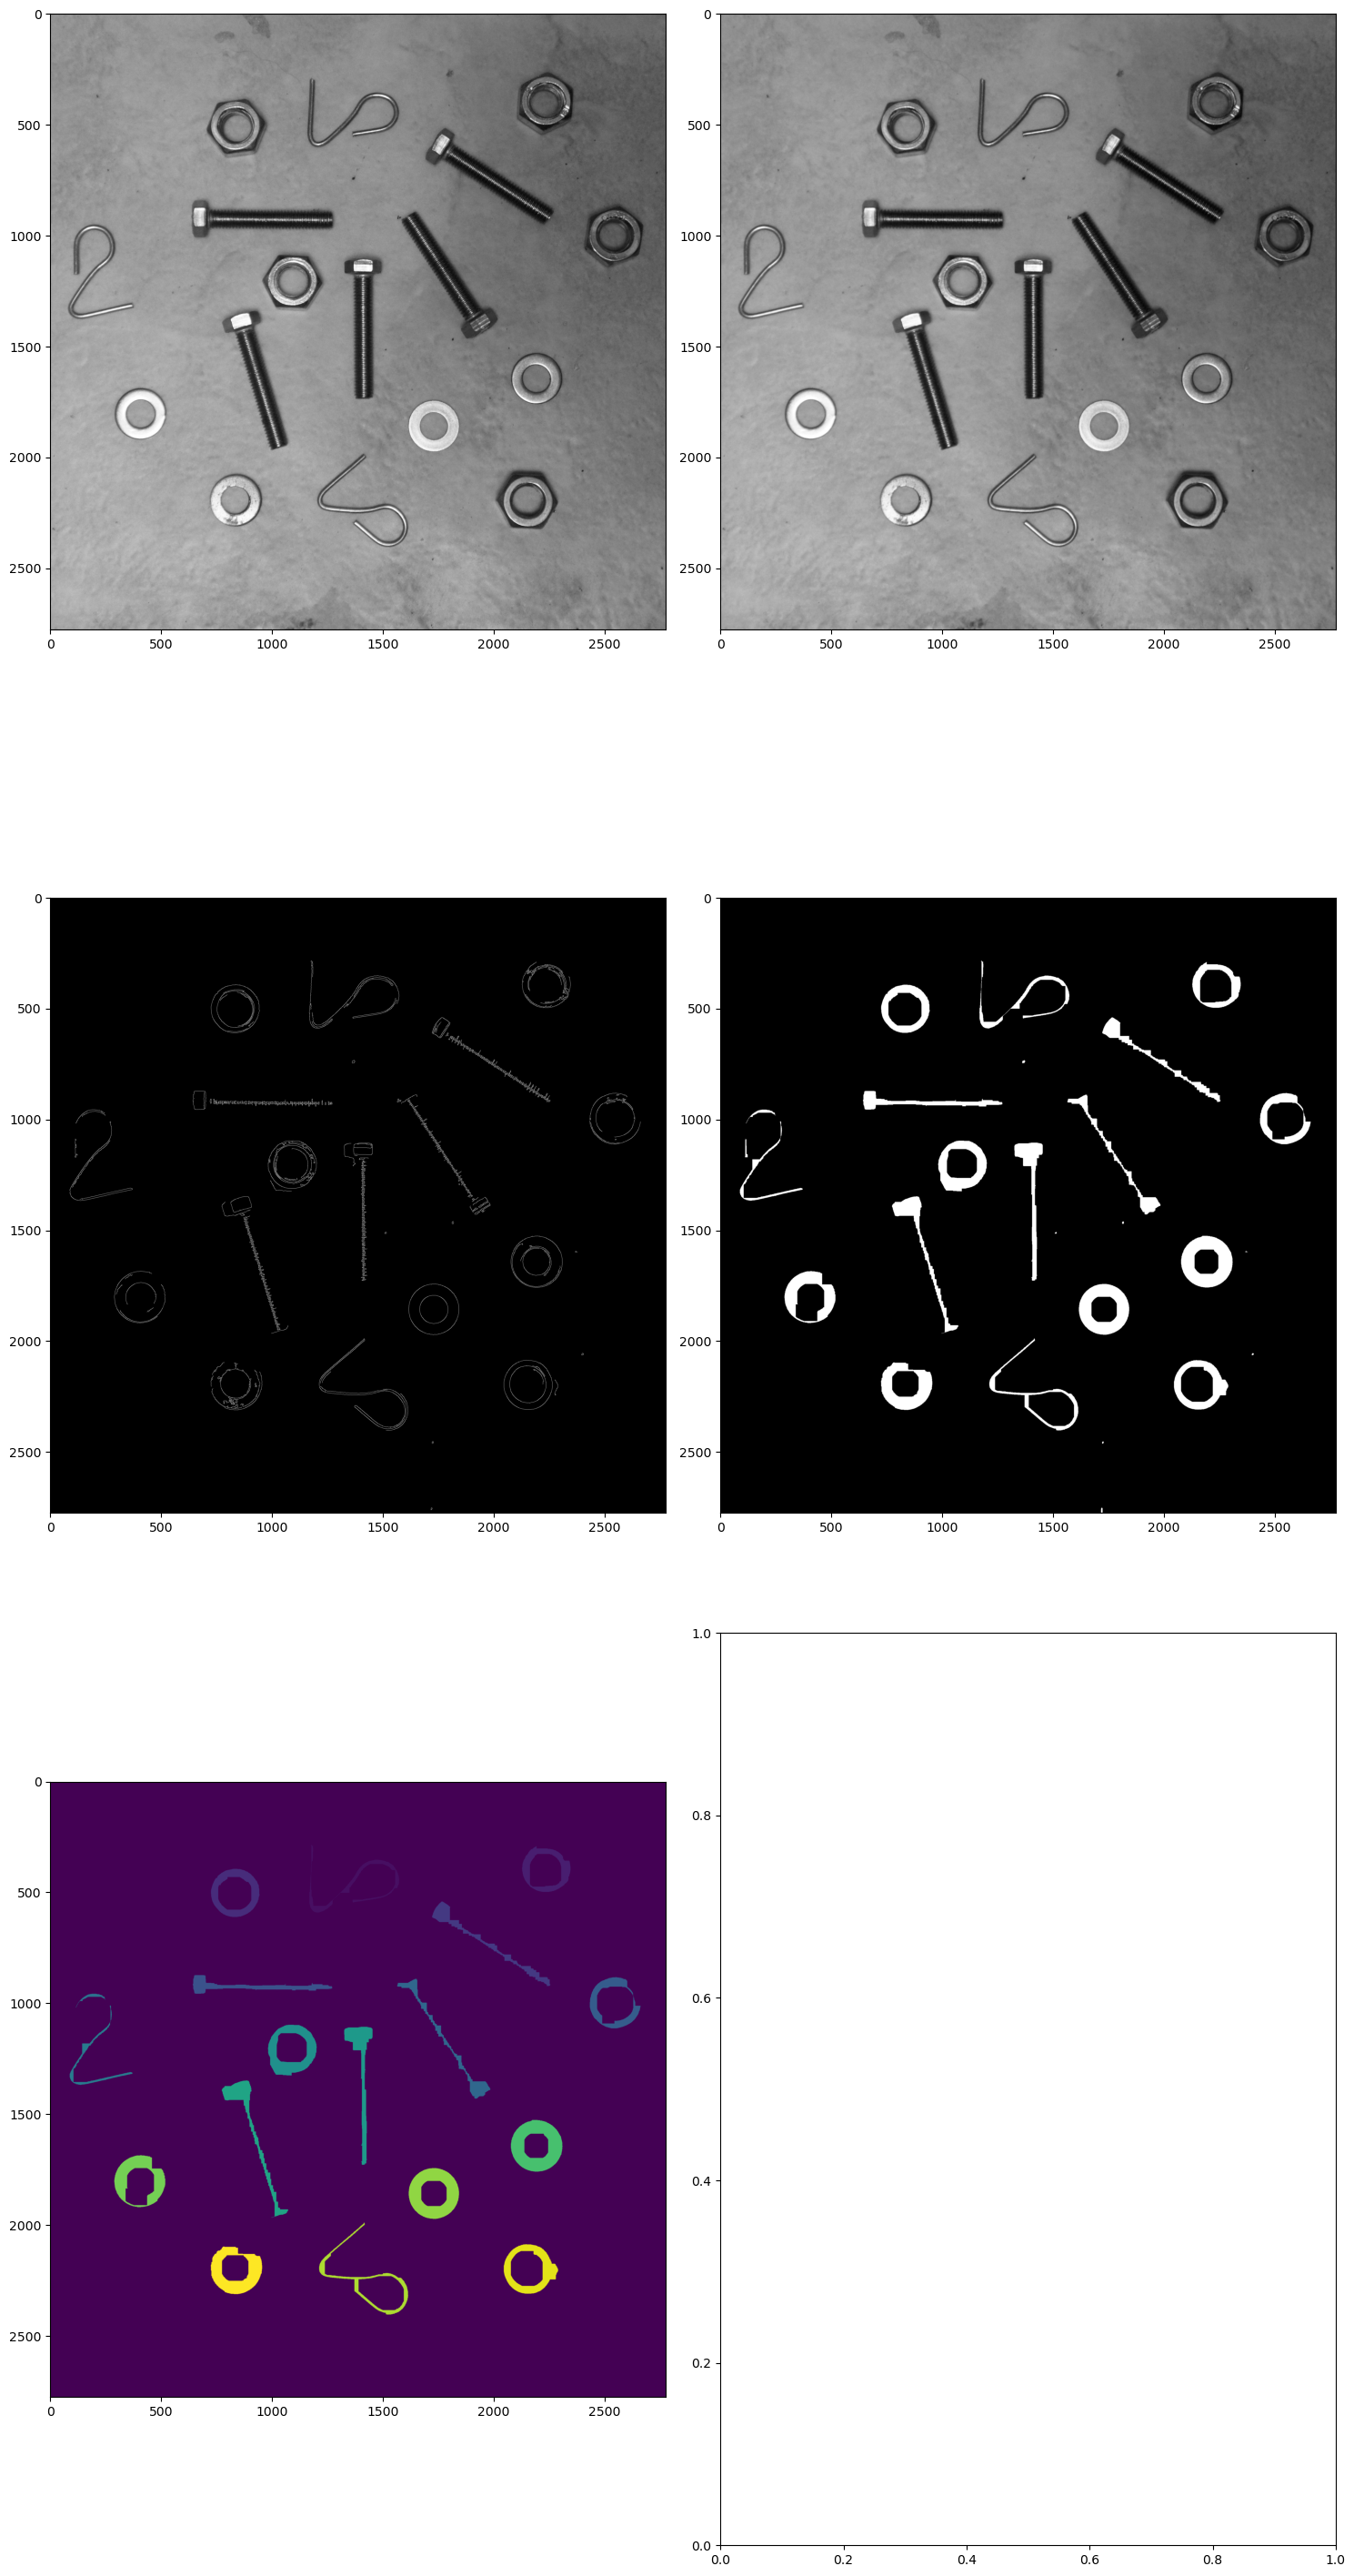

In [54]:
import cv2

bolts = io.imread('bolts.jpg', as_gray=True)

plt.subplots(3,2,figsize = (15,30))
plt.subplot(3,2,1)
plt.imshow(bolts, cmap='gray')
plt.subplot(3,2,2)
bolts = (filters.gaussian(bolts, sigma=1)*255).astype(np.uint8)
plt.imshow(bolts,cmap='gray')
plt.subplot(3,2,3)
canny = cv2.Canny((bolts*255).astype(np.uint8), 50,200)
plt.imshow(canny, cmap='gray')
plt.subplot(3,2,4)
closing = morphology.closing(canny, morphology.footprint_rectangle((55,55)))
plt.imshow(closing,cmap='gray')
plt.subplot(3,2,5)
labels = measure.label(closing)
regions = measure.regionprops(labels)
t = 1000
for r in regions:
    if r.area < t:
        labels[r.label == labels] = 0
plt.imshow(labels)
plt.tight_layout()
plt.show()
